<a href="https://colab.research.google.com/github/carbotton/ML_Notebooks/blob/main/supervised_learning/iris_species_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Species Classifier
### [ Supervised Learning ]

[Kaggle Iris Dataset](https://www.kaggle.com/datasets/uciml/iris)

The columns in this dataset are:

* Id
* SepalLengthCm
* SepalWidthCm
* PetalLengthCm
* PetalWidthCm
* Species

# Dependencies

In [13]:
!pip install kagglehub

# Dataset

In [14]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/iris")

print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/iris


In [15]:
import os
import pandas as pd

files = [f for f in os.listdir(path) if f.lower().endswith('.csv')]
files

['Iris.csv']

In [16]:
csv_file = os.path.join(path, 'Iris.csv')

columns = ["Id","SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm","Species"]
df = pd.read_csv(csv_file, header=0, names=columns)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Species vs PetalLengthCm

/tmp/ipython-input-17-1331791840.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='PetalLengthCm', y='Species', inner='stick', palette='Dark2')


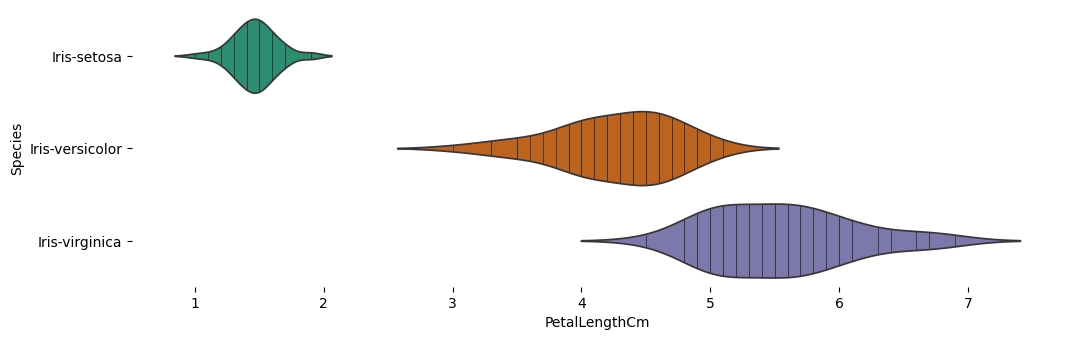

In [17]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Species'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='PetalLengthCm', y='Species', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## Species vs SepalLengthCm

/tmp/ipython-input-18-1760224026.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='SepalLengthCm', y='Species', inner='stick', palette='Dark2')


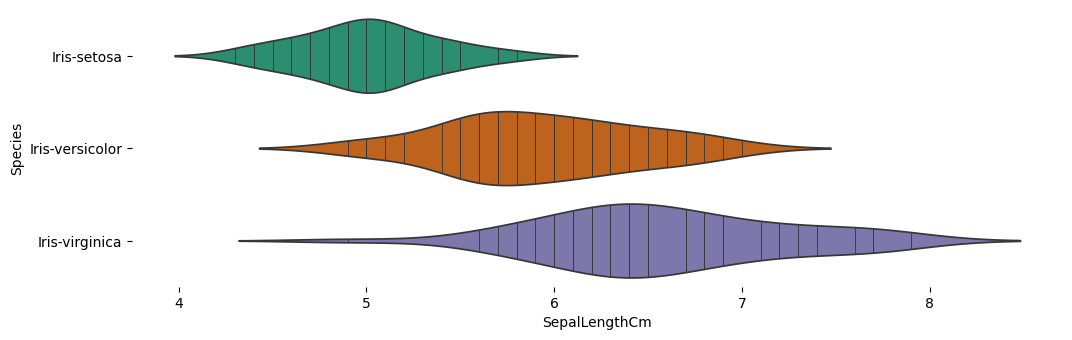

In [18]:

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Species'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='SepalLengthCm', y='Species', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [19]:
print(f"Dataframe types:\n {df.dtypes}\n")

Dataframe types:
 Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object



In [20]:
print(f"Species {df['Species'].unique()}")
print(f"SepalLengthCm {df['SepalLengthCm'].unique()}")
print(f"SepalWidthCm {df['SepalWidthCm'].unique()}")
print(f"PetalLengthCm {df['PetalLengthCm'].unique()}")
print(f"PetalWidthCm {df['PetalWidthCm'].unique()}")

Species ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
SepalLengthCm [5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9]
SepalWidthCm [3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  4.4 3.8 3.3 4.1 4.2 2.3 2.8 2.4
 2.7 2.  2.2 2.5 2.6]
PetalLengthCm [1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5 4.2
 3.6 4.4 4.1 4.8 4.3 5.  3.8 3.7 5.1 3.  6.  5.9 5.6 5.8 6.6 6.3 6.1 5.3
 5.5 6.7 6.9 5.7 6.4 5.4 5.2]
PetalWidthCm [0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3]


* No null values
* No ? or other symbols
* All float64

# Logistic Regression with multi_class='multinomial'

In [22]:
X = df.drop(columns=['Id', 'Species'])
y = df['Species']

# Encode the string labels into integers (0, 1, 2)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_enc = le.fit_transform(y)  # e.g. 'Iris-setosa' → 0, etc.

# Multinomial logistic-regression cassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc, test_size=0.2, random_state=42
)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(
    multi_class='multinomial',  # use softmax for multi‐class
    solver='lbfgs',             # recommended solver for small to medium datasets
    max_iter=200
)

# Train model
clf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=200, multi_class='multinomial')

In [23]:
# Evaluate model on test set
from sklearn.metrics import accuracy_score, classification_report
y_pred = clf.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(
    y_test, y_pred, target_names=le.classes_
))

Test Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



# Logistic Regression with "one-vs-rest" mode (OvR)

One binary logistic classifier per class. At prediction time, scores each classifier and picks the class with highest confidence.

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# OvR logistic-regression classifier
clf_ovr = LogisticRegression(
    multi_class='ovr',    # one-vs-rest strategy
    solver='liblinear',   # liblinear is a good default for OvR
    max_iter=200,
    random_state=42
)

# Train on the training data
clf_ovr.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=200, multi_class='ovr', random_state=42,
                   solver='liblinear')

In [25]:
# Predict on the test set
y_pred_ovr = clf_ovr.predict(X_test)

print("OvR Test Accuracy:", accuracy_score(y_test, y_pred_ovr))
print("\nOvR Classification Report:\n", classification_report(
    y_test, y_pred_ovr, target_names=le.classes_
))


OvR Test Accuracy: 1.0

OvR Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [26]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y_enc, cv=5, scoring='accuracy')
print("5-fold CV accuracies:", scores)
print("Mean CV accuracy:", scores.mean())


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

5-fold CV accuracies: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Mean CV accuracy: 0.9733333333333334


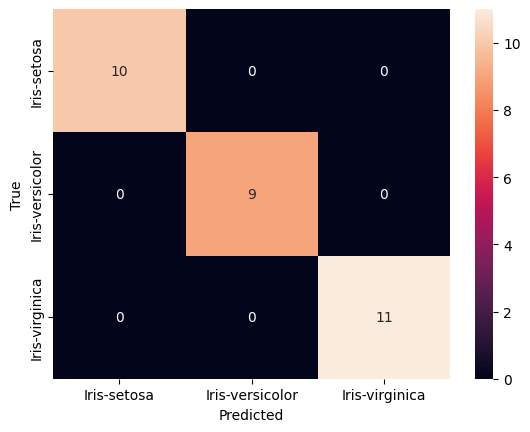

In [27]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_ovr)  # or y_pred from multinomial
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [29]:
# COMPLETE NOTEBOOK WITH ANALYSIS
#https://www.kaggle.com/code/shakhoyatshujon/complete-ml-workflow-on-iris-dataset-by-shujon?kernelSessionId=247088669